In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model


import random

import sys
sys.path.append("..")

import dataset,network,dcgan_model

# Load data

In [2]:
# Preprocessing
scenario= "sinus" #sinus, helix
n_instance = 1000
n_features = 2
latent_space =6
BATCH_SIZE = 100 #50
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 8000  #8000

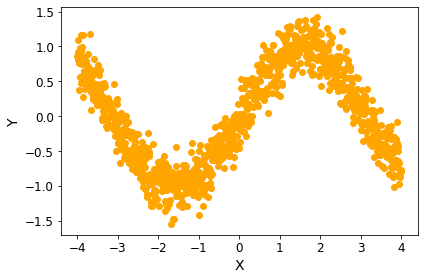

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')

made dataset


# DC-GAN

### Architecture

In [5]:
generator=network.build_generator(latent_space, n_features)
print('##########generator##########:')
generator.summary()
discriminator=network.build_discriminator(n_features, latent_space, BATCH_SIZE)
print('##########discriminator##########:')
discriminator.summary()
dcgan = dcgan_model.DC_GAN(n_features,latent_space,BATCH_SIZE)

##########generator##########:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                96        
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
re_lu (ReLU)                 (None, 16)                0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4)              0         
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 4, 8)              32        
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 8)              32        
_________________________________________________________________
re_lu_1 (ReLU)           

### Preprocessing

In [6]:
train_dataset, scaler, X_train_scaled = dcgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

for data in train_dataset:
    print('train_dataset',data.shape)

data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (100, 2)
Cycles:  10
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)


In [7]:
hist = dcgan.train(train_dataset, epochs, scaler, scaled, X_train=None, y_train=None)

Epoch 1/8000
Epoch 2/8000
Epoch 3/8000
Epoch 4/8000
Epoch 5/8000
Epoch 6/8000
Epoch 7/8000
Epoch 8/8000
Epoch 9/8000
Epoch 10/8000
Epoch 11/8000
Epoch 12/8000
Epoch 13/8000
Epoch 14/8000
Epoch 15/8000
Epoch 16/8000
Epoch 17/8000
Epoch 18/8000
Epoch 19/8000
Epoch 20/8000
Epoch 21/8000
Epoch 22/8000
Epoch 23/8000
Epoch 24/8000
Epoch 25/8000
Epoch 26/8000
Epoch 27/8000
Epoch 28/8000
Epoch 29/8000
Epoch 30/8000
Epoch 31/8000
Epoch 32/8000
Epoch 33/8000
Epoch 34/8000
Epoch 35/8000
Epoch 36/8000
Epoch 37/8000
Epoch 38/8000
Epoch 39/8000
Epoch 40/8000
Epoch 41/8000
Epoch 42/8000
Epoch 43/8000
Epoch 44/8000
Epoch 45/8000
Epoch 46/8000
Epoch 47/8000
Epoch 48/8000
Epoch 49/8000
Epoch 50/8000
Epoch 51/8000
Epoch 52/8000
Epoch 53/8000
Epoch 54/8000
Epoch 55/8000
Epoch 56/8000
Epoch 57/8000
Epoch 58/8000
Epoch 59/8000
Epoch 60/8000
Epoch 61/8000
Epoch 62/8000
Epoch 63/8000
Epoch 64/8000
Epoch 65/8000
Epoch 66/8000
Epoch 67/8000
Epoch 68/8000
Epoch 69/8000
Epoch 70/8000
Epoch 71/8000
Epoch 72/8000
E

Epoch 560/8000
Epoch 561/8000
Epoch 562/8000
Epoch 563/8000
Epoch 564/8000
Epoch 565/8000
Epoch 566/8000
Epoch 567/8000
Epoch 568/8000
Epoch 569/8000
Epoch 570/8000
Epoch 571/8000
Epoch 572/8000
Epoch 573/8000
Epoch 574/8000
Epoch 575/8000
Epoch 576/8000
Epoch 577/8000
Epoch 578/8000
Epoch 579/8000
Epoch 580/8000
Epoch 581/8000
Epoch 582/8000
Epoch 583/8000
Epoch 584/8000
Epoch 585/8000
Epoch 586/8000
Epoch 587/8000
Epoch 588/8000
Epoch 589/8000
Epoch 590/8000
Epoch 591/8000
Epoch 592/8000
Epoch 593/8000
Epoch 594/8000
Epoch 595/8000
Epoch 596/8000
Epoch 597/8000
Epoch 598/8000
Epoch 599/8000
Epoch 600/8000
Epoch 601/8000
Epoch 602/8000
Epoch 603/8000
Epoch 604/8000
Epoch 605/8000
Epoch 606/8000
Epoch 607/8000
Epoch 608/8000
Epoch 609/8000
Epoch 610/8000
Epoch 611/8000
Epoch 612/8000
Epoch 613/8000
Epoch 614/8000
Epoch 615/8000
Epoch 616/8000
Epoch 617/8000
Epoch 618/8000
Epoch 619/8000
Epoch 620/8000
Epoch 621/8000
Epoch 622/8000
Epoch 623/8000
Epoch 624/8000
Epoch 625/8000
Epoch 626/

Epoch 1105/8000
Epoch 1106/8000
Epoch 1107/8000
Epoch 1108/8000
Epoch 1109/8000
Epoch 1110/8000
Epoch 1111/8000
Epoch 1112/8000
Epoch 1113/8000
Epoch 1114/8000
Epoch 1115/8000
Epoch 1116/8000
Epoch 1117/8000
Epoch 1118/8000
Epoch 1119/8000
Epoch 1120/8000
Epoch 1121/8000
Epoch 1122/8000
Epoch 1123/8000
Epoch 1124/8000
Epoch 1125/8000
Epoch 1126/8000
Epoch 1127/8000
Epoch 1128/8000
Epoch 1129/8000
Epoch 1130/8000
Epoch 1131/8000
Epoch 1132/8000
Epoch 1133/8000
Epoch 1134/8000
Epoch 1135/8000
Epoch 1136/8000
Epoch 1137/8000
Epoch 1138/8000
Epoch 1139/8000
Epoch 1140/8000
Epoch 1141/8000
Epoch 1142/8000
Epoch 1143/8000
Epoch 1144/8000
Epoch 1145/8000
Epoch 1146/8000
Epoch 1147/8000
Epoch 1148/8000
Epoch 1149/8000
Epoch 1150/8000
Epoch 1151/8000
Epoch 1152/8000
Epoch 1153/8000
Epoch 1154/8000
Epoch 1155/8000
Epoch 1156/8000
Epoch 1157/8000
Epoch 1158/8000
Epoch 1159/8000
Epoch 1160/8000
Epoch 1161/8000
Epoch 1162/8000
Epoch 1163/8000
Epoch 1164/8000
Epoch 1165/8000
Epoch 1166/8000
Epoch 11

Epoch 1620/8000
Epoch 1621/8000
Epoch 1622/8000
Epoch 1623/8000
Epoch 1624/8000
Epoch 1625/8000
Epoch 1626/8000
Epoch 1627/8000
Epoch 1628/8000
Epoch 1629/8000
Epoch 1630/8000
Epoch 1631/8000
Epoch 1632/8000
Epoch 1633/8000
Epoch 1634/8000
Epoch 1635/8000
Epoch 1636/8000
Epoch 1637/8000
Epoch 1638/8000
Epoch 1639/8000
Epoch 1640/8000
Epoch 1641/8000
Epoch 1642/8000
Epoch 1643/8000
Epoch 1644/8000
Epoch 1645/8000
Epoch 1646/8000
Epoch 1647/8000
Epoch 1648/8000
Epoch 1649/8000
Epoch 1650/8000
Epoch 1651/8000
Epoch 1652/8000
Epoch 1653/8000
Epoch 1654/8000
Epoch 1655/8000
Epoch 1656/8000
Epoch 1657/8000
Epoch 1658/8000
Epoch 1659/8000
Epoch 1660/8000
Epoch 1661/8000
Epoch 1662/8000
Epoch 1663/8000
Epoch 1664/8000
Epoch 1665/8000
Epoch 1666/8000
Epoch 1667/8000
Epoch 1668/8000
Epoch 1669/8000
Epoch 1670/8000
Epoch 1671/8000
Epoch 1672/8000
Epoch 1673/8000
Epoch 1674/8000
Epoch 1675/8000
Epoch 1676/8000
Epoch 1677/8000
Epoch 1678/8000
Epoch 1679/8000
Epoch 1680/8000
Epoch 1681/8000
Epoch 16

Epoch 2139/8000
Epoch 2140/8000
Epoch 2141/8000
Epoch 2142/8000
Epoch 2143/8000
Epoch 2144/8000
Epoch 2145/8000
Epoch 2146/8000
Epoch 2147/8000
Epoch 2148/8000
Epoch 2149/8000
Epoch 2150/8000
Epoch 2151/8000
Epoch 2152/8000
Epoch 2153/8000
Epoch 2154/8000
Epoch 2155/8000
Epoch 2156/8000
Epoch 2157/8000
Epoch 2158/8000
Epoch 2159/8000
Epoch 2160/8000
Epoch 2161/8000
Epoch 2162/8000
Epoch 2163/8000
Epoch 2164/8000
Epoch 2165/8000
Epoch 2166/8000
Epoch 2167/8000
Epoch 2168/8000
Epoch 2169/8000
Epoch 2170/8000
Epoch 2171/8000
Epoch 2172/8000
Epoch 2173/8000
Epoch 2174/8000
Epoch 2175/8000
Epoch 2176/8000
Epoch 2177/8000
Epoch 2178/8000
Epoch 2179/8000
Epoch 2180/8000
Epoch 2181/8000
Epoch 2182/8000
Epoch 2183/8000
Epoch 2184/8000
Epoch 2185/8000
Epoch 2186/8000
Epoch 2187/8000
Epoch 2188/8000
Epoch 2189/8000
Epoch 2190/8000
Epoch 2191/8000
Epoch 2192/8000
Epoch 2193/8000
Epoch 2194/8000
Epoch 2195/8000
Epoch 2196/8000
Epoch 2197/8000
Epoch 2198/8000
Epoch 2199/8000
Epoch 2200/8000
Epoch 22

Epoch 2653/8000
Epoch 2654/8000
Epoch 2655/8000
Epoch 2656/8000
Epoch 2657/8000
Epoch 2658/8000
Epoch 2659/8000
Epoch 2660/8000
Epoch 2661/8000
Epoch 2662/8000
Epoch 2663/8000
Epoch 2664/8000
Epoch 2665/8000
Epoch 2666/8000
Epoch 2667/8000
Epoch 2668/8000
Epoch 2669/8000
Epoch 2670/8000
Epoch 2671/8000
Epoch 2672/8000
Epoch 2673/8000
Epoch 2674/8000
Epoch 2675/8000
Epoch 2676/8000
Epoch 2677/8000
Epoch 2678/8000
Epoch 2679/8000
Epoch 2680/8000
Epoch 2681/8000
Epoch 2682/8000
Epoch 2683/8000
Epoch 2684/8000
Epoch 2685/8000
Epoch 2686/8000
Epoch 2687/8000
Epoch 2688/8000
Epoch 2689/8000
Epoch 2690/8000
Epoch 2691/8000
Epoch 2692/8000
Epoch 2693/8000
Epoch 2694/8000
Epoch 2695/8000
Epoch 2696/8000
Epoch 2697/8000
Epoch 2698/8000
Epoch 2699/8000
Epoch 2700/8000
Epoch 2701/8000
Epoch 2702/8000
Epoch 2703/8000
Epoch 2704/8000
Epoch 2705/8000
Epoch 2706/8000
Epoch 2707/8000
Epoch 2708/8000
Epoch 2709/8000
Epoch 2710/8000
Epoch 2711/8000
Epoch 2712/8000
Epoch 2713/8000
Epoch 2714/8000
Epoch 27

Epoch 3172/8000
Epoch 3173/8000
Epoch 3174/8000
Epoch 3175/8000
Epoch 3176/8000
Epoch 3177/8000
Epoch 3178/8000
Epoch 3179/8000
Epoch 3180/8000
Epoch 3181/8000
Epoch 3182/8000
Epoch 3183/8000
Epoch 3184/8000
Epoch 3185/8000
Epoch 3186/8000
Epoch 3187/8000
Epoch 3188/8000
Epoch 3189/8000
Epoch 3190/8000
Epoch 3191/8000
Epoch 3192/8000
Epoch 3193/8000
Epoch 3194/8000
Epoch 3195/8000
Epoch 3196/8000
Epoch 3197/8000
Epoch 3198/8000
Epoch 3199/8000
Epoch 3200/8000
Epoch 3201/8000
Epoch 3202/8000
Epoch 3203/8000
Epoch 3204/8000
Epoch 3205/8000
Epoch 3206/8000
Epoch 3207/8000
Epoch 3208/8000
Epoch 3209/8000
Epoch 3210/8000
Epoch 3211/8000
Epoch 3212/8000
Epoch 3213/8000
Epoch 3214/8000
Epoch 3215/8000
Epoch 3216/8000
Epoch 3217/8000
Epoch 3218/8000
Epoch 3219/8000
Epoch 3220/8000
Epoch 3221/8000
Epoch 3222/8000
Epoch 3223/8000
Epoch 3224/8000
Epoch 3225/8000
Epoch 3226/8000
Epoch 3227/8000
Epoch 3228/8000
Epoch 3229/8000
Epoch 3230/8000
Epoch 3231/8000
Epoch 3232/8000
Epoch 3233/8000
Epoch 32

Epoch 3692/8000
Epoch 3693/8000
Epoch 3694/8000
Epoch 3695/8000
Epoch 3696/8000
Epoch 3697/8000
Epoch 3698/8000
Epoch 3699/8000
Epoch 3700/8000
Epoch 3701/8000
Epoch 3702/8000
Epoch 3703/8000
Epoch 3704/8000
Epoch 3705/8000
Epoch 3706/8000
Epoch 3707/8000
Epoch 3708/8000
Epoch 3709/8000
Epoch 3710/8000
Epoch 3711/8000
Epoch 3712/8000
Epoch 3713/8000
Epoch 3714/8000
Epoch 3715/8000
Epoch 3716/8000
Epoch 3717/8000
Epoch 3718/8000
Epoch 3719/8000
Epoch 3720/8000
Epoch 3721/8000
Epoch 3722/8000
Epoch 3723/8000
Epoch 3724/8000
Epoch 3725/8000
Epoch 3726/8000
Epoch 3727/8000
Epoch 3728/8000
Epoch 3729/8000
Epoch 3730/8000
Epoch 3731/8000
Epoch 3732/8000
Epoch 3733/8000
Epoch 3734/8000
Epoch 3735/8000
Epoch 3736/8000
Epoch 3737/8000
Epoch 3738/8000
Epoch 3739/8000
Epoch 3740/8000
Epoch 3741/8000
Epoch 3742/8000
Epoch 3743/8000
Epoch 3744/8000
Epoch 3745/8000
Epoch 3746/8000
Epoch 3747/8000
Epoch 3748/8000
Epoch 3749/8000
Epoch 3750/8000
Epoch 3751/8000
Epoch 3752/8000
Epoch 3753/8000
Epoch 37

Epoch 4211/8000
Epoch 4212/8000
Epoch 4213/8000
Epoch 4214/8000
Epoch 4215/8000
Epoch 4216/8000
Epoch 4217/8000
Epoch 4218/8000
Epoch 4219/8000
Epoch 4220/8000
Epoch 4221/8000
Epoch 4222/8000
Epoch 4223/8000
Epoch 4224/8000
Epoch 4225/8000
Epoch 4226/8000
Epoch 4227/8000
Epoch 4228/8000
Epoch 4229/8000
Epoch 4230/8000
Epoch 4231/8000
Epoch 4232/8000
Epoch 4233/8000
Epoch 4234/8000
Epoch 4235/8000
Epoch 4236/8000
Epoch 4237/8000
Epoch 4238/8000
Epoch 4239/8000
Epoch 4240/8000
Epoch 4241/8000
Epoch 4242/8000
Epoch 4243/8000
Epoch 4244/8000
Epoch 4245/8000
Epoch 4246/8000
Epoch 4247/8000
Epoch 4248/8000
Epoch 4249/8000
Epoch 4250/8000
Epoch 4251/8000
Epoch 4252/8000
Epoch 4253/8000
Epoch 4254/8000
Epoch 4255/8000
Epoch 4256/8000
Epoch 4257/8000
Epoch 4258/8000
Epoch 4259/8000
Epoch 4260/8000
Epoch 4261/8000
Epoch 4262/8000
Epoch 4263/8000
Epoch 4264/8000
Epoch 4265/8000
Epoch 4266/8000
Epoch 4267/8000
Epoch 4268/8000
Epoch 4269/8000
Epoch 4270/8000
Epoch 4271/8000
Epoch 4272/8000
Epoch 42

Epoch 4727/8000
Epoch 4728/8000
Epoch 4729/8000
Epoch 4730/8000
Epoch 4731/8000
Epoch 4732/8000
Epoch 4733/8000
Epoch 4734/8000
Epoch 4735/8000
Epoch 4736/8000
Epoch 4737/8000
Epoch 4738/8000
Epoch 4739/8000
Epoch 4740/8000
Epoch 4741/8000
Epoch 4742/8000
Epoch 4743/8000
Epoch 4744/8000
Epoch 4745/8000
Epoch 4746/8000
Epoch 4747/8000
Epoch 4748/8000
Epoch 4749/8000
Epoch 4750/8000
Epoch 4751/8000
Epoch 4752/8000
Epoch 4753/8000
Epoch 4754/8000
Epoch 4755/8000
Epoch 4756/8000
Epoch 4757/8000
Epoch 4758/8000
Epoch 4759/8000
Epoch 4760/8000
Epoch 4761/8000
Epoch 4762/8000
Epoch 4763/8000
Epoch 4764/8000
Epoch 4765/8000
Epoch 4766/8000
Epoch 4767/8000
Epoch 4768/8000
Epoch 4769/8000
Epoch 4770/8000
Epoch 4771/8000
Epoch 4772/8000
Epoch 4773/8000
Epoch 4774/8000
Epoch 4775/8000
Epoch 4776/8000
Epoch 4777/8000
Epoch 4778/8000
Epoch 4779/8000
Epoch 4780/8000
Epoch 4781/8000
Epoch 4782/8000
Epoch 4783/8000
Epoch 4784/8000
Epoch 4785/8000
Epoch 4786/8000
Epoch 4787/8000
Epoch 4788/8000
Epoch 47

Epoch 5241/8000
Epoch 5242/8000
Epoch 5243/8000
Epoch 5244/8000
Epoch 5245/8000
Epoch 5246/8000
Epoch 5247/8000
Epoch 5248/8000
Epoch 5249/8000
Epoch 5250/8000
Epoch 5251/8000
Epoch 5252/8000
Epoch 5253/8000
Epoch 5254/8000
Epoch 5255/8000
Epoch 5256/8000
Epoch 5257/8000
Epoch 5258/8000
Epoch 5259/8000
Epoch 5260/8000
Epoch 5261/8000
Epoch 5262/8000
Epoch 5263/8000
Epoch 5264/8000
Epoch 5265/8000
Epoch 5266/8000
Epoch 5267/8000
Epoch 5268/8000
Epoch 5269/8000
Epoch 5270/8000
Epoch 5271/8000
Epoch 5272/8000
Epoch 5273/8000
Epoch 5274/8000
Epoch 5275/8000
Epoch 5276/8000
Epoch 5277/8000
Epoch 5278/8000
Epoch 5279/8000
Epoch 5280/8000
Epoch 5281/8000
Epoch 5282/8000
Epoch 5283/8000
Epoch 5284/8000
Epoch 5285/8000
Epoch 5286/8000
Epoch 5287/8000
Epoch 5288/8000
Epoch 5289/8000
Epoch 5290/8000
Epoch 5291/8000
Epoch 5292/8000
Epoch 5293/8000
Epoch 5294/8000
Epoch 5295/8000
Epoch 5296/8000
Epoch 5297/8000
Epoch 5298/8000
Epoch 5299/8000
Epoch 5300/8000
Epoch 5301/8000
Epoch 5302/8000
Epoch 53

Epoch 5756/8000
Epoch 5757/8000
Epoch 5758/8000
Epoch 5759/8000
Epoch 5760/8000
Epoch 5761/8000
Epoch 5762/8000
Epoch 5763/8000
Epoch 5764/8000
Epoch 5765/8000
Epoch 5766/8000
Epoch 5767/8000
Epoch 5768/8000
Epoch 5769/8000
Epoch 5770/8000
Epoch 5771/8000
Epoch 5772/8000
Epoch 5773/8000
Epoch 5774/8000
Epoch 5775/8000
Epoch 5776/8000
Epoch 5777/8000
Epoch 5778/8000
Epoch 5779/8000
Epoch 5780/8000
Epoch 5781/8000
Epoch 5782/8000
Epoch 5783/8000
Epoch 5784/8000
Epoch 5785/8000
Epoch 5786/8000
Epoch 5787/8000
Epoch 5788/8000
Epoch 5789/8000
Epoch 5790/8000
Epoch 5791/8000
Epoch 5792/8000
Epoch 5793/8000
Epoch 5794/8000
Epoch 5795/8000
Epoch 5796/8000
Epoch 5797/8000
Epoch 5798/8000
Epoch 5799/8000
Epoch 5800/8000
Epoch 5801/8000
Epoch 5802/8000
Epoch 5803/8000
Epoch 5804/8000
Epoch 5805/8000
Epoch 5806/8000
Epoch 5807/8000
Epoch 5808/8000
Epoch 5809/8000
Epoch 5810/8000
Epoch 5811/8000
Epoch 5812/8000
Epoch 5813/8000
Epoch 5814/8000
Epoch 5815/8000
Epoch 5816/8000
Epoch 5817/8000
Epoch 58

Epoch 6274/8000
Epoch 6275/8000
Epoch 6276/8000
Epoch 6277/8000
Epoch 6278/8000
Epoch 6279/8000
Epoch 6280/8000
Epoch 6281/8000
Epoch 6282/8000
Epoch 6283/8000
Epoch 6284/8000
Epoch 6285/8000
Epoch 6286/8000
Epoch 6287/8000
Epoch 6288/8000
Epoch 6289/8000
Epoch 6290/8000
Epoch 6291/8000
Epoch 6292/8000
Epoch 6293/8000
Epoch 6294/8000
Epoch 6295/8000
Epoch 6296/8000
Epoch 6297/8000
Epoch 6298/8000
Epoch 6299/8000
Epoch 6300/8000
Epoch 6301/8000
Epoch 6302/8000
Epoch 6303/8000
Epoch 6304/8000
Epoch 6305/8000
Epoch 6306/8000
Epoch 6307/8000
Epoch 6308/8000
Epoch 6309/8000
Epoch 6310/8000
Epoch 6311/8000
Epoch 6312/8000
Epoch 6313/8000
Epoch 6314/8000
Epoch 6315/8000
Epoch 6316/8000
Epoch 6317/8000
Epoch 6318/8000
Epoch 6319/8000
Epoch 6320/8000
Epoch 6321/8000
Epoch 6322/8000
Epoch 6323/8000
Epoch 6324/8000
Epoch 6325/8000
Epoch 6326/8000
Epoch 6327/8000
Epoch 6328/8000
Epoch 6329/8000
Epoch 6330/8000
Epoch 6331/8000
Epoch 6332/8000
Epoch 6333/8000
Epoch 6334/8000
Epoch 6335/8000
Epoch 63

Epoch 6788/8000
Epoch 6789/8000
Epoch 6790/8000
Epoch 6791/8000
Epoch 6792/8000
Epoch 6793/8000
Epoch 6794/8000
Epoch 6795/8000
Epoch 6796/8000
Epoch 6797/8000
Epoch 6798/8000
Epoch 6799/8000
Epoch 6800/8000
Epoch 6801/8000
Epoch 6802/8000
Epoch 6803/8000
Epoch 6804/8000
Epoch 6805/8000
Epoch 6806/8000
Epoch 6807/8000
Epoch 6808/8000
Epoch 6809/8000
Epoch 6810/8000
Epoch 6811/8000
Epoch 6812/8000
Epoch 6813/8000
Epoch 6814/8000
Epoch 6815/8000
Epoch 6816/8000
Epoch 6817/8000
Epoch 6818/8000
Epoch 6819/8000
Epoch 6820/8000
Epoch 6821/8000
Epoch 6822/8000
Epoch 6823/8000
Epoch 6824/8000
Epoch 6825/8000
Epoch 6826/8000
Epoch 6827/8000
Epoch 6828/8000
Epoch 6829/8000
Epoch 6830/8000
Epoch 6831/8000
Epoch 6832/8000
Epoch 6833/8000
Epoch 6834/8000
Epoch 6835/8000
Epoch 6836/8000
Epoch 6837/8000
Epoch 6838/8000
Epoch 6839/8000
Epoch 6840/8000
Epoch 6841/8000
Epoch 6842/8000
Epoch 6843/8000
Epoch 6844/8000
Epoch 6845/8000
Epoch 6846/8000
Epoch 6847/8000
Epoch 6848/8000
Epoch 6849/8000
Epoch 68

Epoch 7304/8000
Epoch 7305/8000
Epoch 7306/8000
Epoch 7307/8000
Epoch 7308/8000
Epoch 7309/8000
Epoch 7310/8000
Epoch 7311/8000
Epoch 7312/8000
Epoch 7313/8000
Epoch 7314/8000
Epoch 7315/8000
Epoch 7316/8000
Epoch 7317/8000
Epoch 7318/8000
Epoch 7319/8000
Epoch 7320/8000
Epoch 7321/8000
Epoch 7322/8000
Epoch 7323/8000
Epoch 7324/8000
Epoch 7325/8000
Epoch 7326/8000
Epoch 7327/8000
Epoch 7328/8000
Epoch 7329/8000
Epoch 7330/8000
Epoch 7331/8000
Epoch 7332/8000
Epoch 7333/8000
Epoch 7334/8000
Epoch 7335/8000
Epoch 7336/8000
Epoch 7337/8000
Epoch 7338/8000
Epoch 7339/8000
Epoch 7340/8000
Epoch 7341/8000
Epoch 7342/8000
Epoch 7343/8000
Epoch 7344/8000
Epoch 7345/8000
Epoch 7346/8000
Epoch 7347/8000
Epoch 7348/8000
Epoch 7349/8000
Epoch 7350/8000
Epoch 7351/8000
Epoch 7352/8000
Epoch 7353/8000
Epoch 7354/8000
Epoch 7355/8000
Epoch 7356/8000
Epoch 7357/8000
Epoch 7358/8000
Epoch 7359/8000
Epoch 7360/8000
Epoch 7361/8000
Epoch 7362/8000
Epoch 7363/8000
Epoch 7364/8000
Epoch 7365/8000
Epoch 73

Epoch 7823/8000
Epoch 7824/8000
Epoch 7825/8000
Epoch 7826/8000
Epoch 7827/8000
Epoch 7828/8000
Epoch 7829/8000
Epoch 7830/8000
Epoch 7831/8000
Epoch 7832/8000
Epoch 7833/8000
Epoch 7834/8000
Epoch 7835/8000
Epoch 7836/8000
Epoch 7837/8000
Epoch 7838/8000
Epoch 7839/8000
Epoch 7840/8000
Epoch 7841/8000
Epoch 7842/8000
Epoch 7843/8000
Epoch 7844/8000
Epoch 7845/8000
Epoch 7846/8000
Epoch 7847/8000
Epoch 7848/8000
Epoch 7849/8000
Epoch 7850/8000
Epoch 7851/8000
Epoch 7852/8000
Epoch 7853/8000
Epoch 7854/8000
Epoch 7855/8000
Epoch 7856/8000
Epoch 7857/8000
Epoch 7858/8000
Epoch 7859/8000
Epoch 7860/8000
Epoch 7861/8000
Epoch 7862/8000
Epoch 7863/8000
Epoch 7864/8000
Epoch 7865/8000
Epoch 7866/8000
Epoch 7867/8000
Epoch 7868/8000
Epoch 7869/8000
Epoch 7870/8000
Epoch 7871/8000
Epoch 7872/8000
Epoch 7873/8000
Epoch 7874/8000
Epoch 7875/8000
Epoch 7876/8000
Epoch 7877/8000
Epoch 7878/8000
Epoch 7879/8000
Epoch 7880/8000
Epoch 7881/8000
Epoch 7882/8000
Epoch 7883/8000
Epoch 7884/8000
Epoch 78

#### plot loss

Loss: 


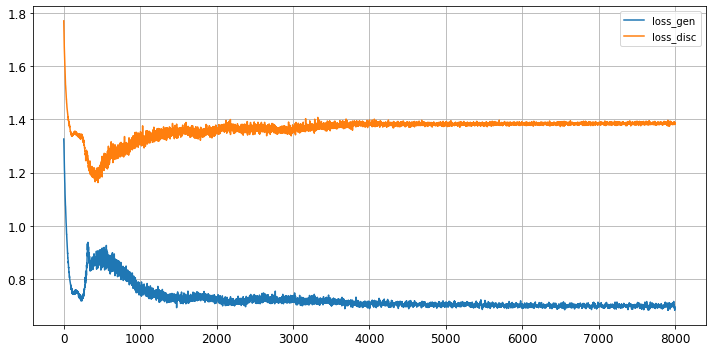

In [8]:
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'],)

ax.grid()
plt.tight_layout()
plt.savefig('GANS/Losses/GANS_loss'+'.png')

### Sampleing from the latent space

Predicted Values: (1000, 2)


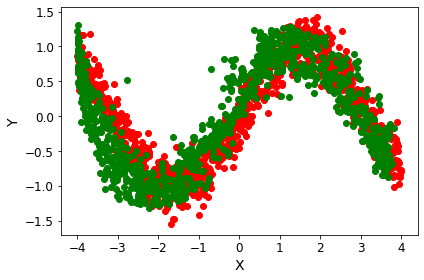

In [9]:
#sampling from the latent space without prediction
latent_values = tf.random.normal([1000, latent_space], mean=0.0, stddev=0.1)

#predict the labels of the data values on the basis of the trained model.
predicted_values = dcgan.generator.predict(latent_values)
if scaled == '-1-1':
    predicted_values[:,:]=(predicted_values[:,:])
    predicted_values = scaler.inverse_transform(predicted_values)
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    

if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",latent_space)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("use_bias:",use_bias)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    ab.scatter(X_train[:,0],X_train[:,1],y_train, c='r')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2], c='green')
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
else:
    print("Predicted Values:",predicted_values.shape)
    plt.scatter(X_train, y_train,c='r')
    plt.scatter(predicted_values[:,0],predicted_values[:,1], c='green')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    

### Applying the prediction function

## Fixed Input

input_test : (900, 2)


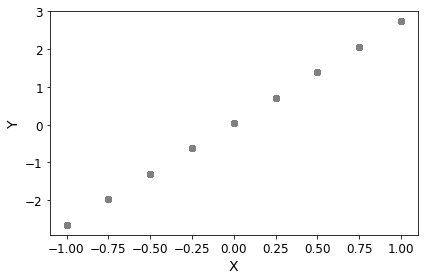

In [10]:
# define these for desired prediction
x_input = [-4,-3,-2,-1,0,1,2,3,4]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
predictthis = scaler.transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [11]:
X_generated = dcgan.predict(input_test, scaler)

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

Generated Data: (899, 2)


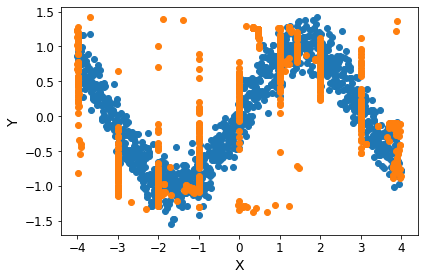

In [12]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')
    #ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', label='Sample Data')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,label="Sample Data")
    plt.scatter(X_generated[:,0],X_generated[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()